# Tutorial 2: Introducción a Pandas y Clasificación usando Python

**Autores:** Felipe Bravo, Hernán Sarmiento, Aymé Arango, Alison Fernandez, Cinthia Mabel Sánchez, Juan Pablo Silva

**Fecha:** "Octubre 2020"

**Objetivo:** El objetivo de este tutorial es relacionarse con el paquete Pandas y las bibliotecas necesarias para entrenar clasificadores.

# Herramientas

### Anaconda
La forma más fácil de tener un ambiente de Python **local** con todas las bibliotecas más comunes es instalar *Anaconda*. Para esto:

- Descarga en el siguiente link la última versión de Python: https://www.python.org/downloads/
- Descarga en el siguiente link la última versión de Anaconda para Python 3.7: https://www.anaconda.com/distribution/
- Asegúrate de dejar en el PATH el directorio `bin` de anaconda. Puedes probar tu instalación ejecutando `python` en un terminal y verificar que diga algo como `Python 3.7.3 |Anaconda 4.4.0` al principio.

**Instalación de Bibliotecas:**
Anaconda facilita mucho la instalación de las bibliotecas que usaremos en este laboratorio. Instalar las bibliotecas (`scikit-learn`, `jupyter`) desde cero puede ser un poco complicado. Por lo tanto, instalar Anaconda es altamente recomendado para estas sesiones de laboratorio.

1. Abrir aplicación Anaconda prompt.
2. Ejecutar comando: conda install *biblioteca*

Para este tutorial instalar las bibliotecas: *numpy*, *scikit-learn*, *pandas*, *matplotlib*, *seaborn*

### Celda de verificación

Ejecute esta celda para verificar que las bibliotecas fueron instaladas correctamente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection

from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.neighbors import KNeighborsClassifier


print("Si muestra este mensaje es porque la carga de las librerías anteriores está ok!")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Si muestra este mensaje es porque la carga de las librerías anteriores está ok!


### Jupyter

**Jupyter notebook** viene con anaconda, es una aplicación Web que permite crear documentos con código Python, similar a los R Notebooks o R Markdown. Para este tutorial y la tarea 2 usaremos un **notebook** donde deberán completar sus respuestas en el mismo archivo.

Para cargar y editar un archivo.ipynb deben abrir la terminal del computador y ejecutar `jupyter notebook`. Esto abrirá el navegador donde pueden buscar el archivo .ipynb dentro del directorio. TIP: con Shift-Enter pueden ejecutar cada bloque del notebook.


El archivo en formato **HTML** se puede descargar ejecutando el siguiente comando desde la consola de anaconda: 

`jupyter nbconvert nombre_archivo.ipynb --to html`

Otra opción más sencilla es descargarlo desde el mismo notebook, haciendo clic en:
*File -> Download as-> HTML (.html)*

### Scikit-learn

Hay muchas bibliotecas para hacer análisis de datos. Para este tutorial vamos a usar **scikit-learn** (http://scikit-learn.org) que contiene muchos modelos de machine learning ya instalados. 

**OJO**: Si ya instalaste *Anaconda*, no necesitas instalar nada dado que viene en el pack.

## Google Colab

Aunque usaremos un notebook local (porque es importante que se familiaricen con anaconda), deben conocer <a href="https://colab.research.google.com/notebooks/welcome.ipynb?hl=es_US">Colaboratory</a>, también llamado "Colab", que esencialmente es un jupyter notebook con las siguientes ventajas:
- No requiere configuración
- Da acceso gratuito a GPUs
- Permite compartir contenido fácilmente

# Introducción a Pandas


Pandas es una herramienta de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar [<https://pandas.pydata.org/>]. Este paquete de Python proporciona estructuras de datos similares a los dataframes de R (tablas con filas de observaciones y columnas de variables).

Pandas proporciona mecanismos eficientes para trabajar con diferentes formatos de datos como archivos CSV (del inglés comma-separated values), archivos de Excel o bases de datos. 

Las dos estructuras de datos principales de Pandas son: **Series** (Matriz unidimensional etiquetada de forma homogénea) y **DataFrame** (Estructura de datos bidimensional con columnas que pueden contener diferentes tipos de datos). Podríamos pensar en las estructuras de datos de Pandas como contenedores flexibles para datos de dimensiones inferiores. Por ejemplo, DataFrame es un contenedor para Series y Series es un contenedor para escalares [<https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html>].

![alt text](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)
Source:https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

## Crear dataframes y cargar datos

In [ ]:
#standard import form used
import pandas as pd 
import numpy as np

Cuando desee utilizar Pandas para el análisis de datos, normalmente lo utilizará de tres formas diferentes:

* Convertir una lista, diccionario o matriz Numpy en un dataframe de Pandas.
* Abrir un archivo local usando Pandas, generalmente un archivo CSV, pero también podría ser un archivo de texto delimitado (como TSV), Excel, etc.
* Abrir un archivo o base de datos remota como un CSV o JSON en un sitio web a través de una URL o desde una tabla / base de datos SQL.

In [ ]:
#In order to convert a certain Python object (dictionary, lists etc) the basic command is:
pd.DataFrame()

""


In [ ]:
#From dict
df = pd.DataFrame({
    'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
    'col2': ['Gold', 'Bronze', 'Gold', 'Silver'],
    'col3': [1, 2, np.nan, 4]
})

df

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


In [ ]:
#From list
l = [['Item0', 'Gold', 1],
     ['Item0', 'Bronze', 2],
     ["Item1", "Gold", np.nan],
     ["Item1", "Silver", 4]
     ]

df2 = pd.DataFrame(l, columns=['col1', 'col2', 'col3'])
df2

,col1,col2,col3
0,Item0,Gold,1.0
1,Item0,Bronze,2.0
2,Item1,Gold,NaN
3,Item1,Silver,4.0


In [ ]:
#Reading data as dataframe from .csv
#By default the delimiter or separator is comma. When data has another delimiter, you must define it (for example: sep='\t')

iris_df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

Ejecutando `help(pd.read_csv)` pueden ver la documentación del objeto.

## Explorar datos

Una vez cargados los datos, es momento de revisar nuestro dataframe. 
Ejecutar el nombre del dataframe le proporciona la tabla completa, pero también puede obtener información específica usando comandos como los siguientes.

In [ ]:
# Displays the first 5 rows. You can define the first 'n' rows to show, for example: df.head(n)
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Similar to head, but displays the last rows
iris_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
# The dimensions of the dataframe as a (rows, cols) tuple
iris_df.shape

(150, 5)

In [ ]:
# The number of rows. Equal to df.shape[0]
len(iris_df) 

150

In [ ]:
# An object with the column names
iris_df.columns 

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
# You can rename (specific) columns using its names (for example: "sepal.length" or iris_df.columns[0])
# Also can be renamed by its index

iris_df = iris_df.rename(columns={"sepal.length": "sepal_length",
                                  "sepal.width": "sepal_width",
                                  "petal.length": "petal_length",
                                  "petal.width": "petal_width"})


#Also you can do it modifying the data frame, but is necessary write all cols names (in order)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [ ]:
# Unique values from a column
iris_df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
# Columns and their types
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
variety          object
dtype: object

In [ ]:
# Prints information about index dtype and column dtypes, non-null values and memory usage.
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Displays descriptive stats for all columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Allows you to count nan values by columns
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
variety         0
dtype: int64

In [ ]:
# would allow you to view unique values and counts for a series (like a column or a few columns). 
iris_df['sepal_length'].value_counts(dropna=False)

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

También es posible obtener estadísticas sobre todo el dataframe o una serie (una columna, etc.):

*   *df.mean()* Returns the mean of all columns
*   *df.corr()* Returns the correlation between columns in a data frame
*   *df.count()* Returns the number of non-null values in each data frame column
*   *df.max()* Returns the highest value in each column
*   *df.min()* Returns the lowest value in each column
*   *df.median()* Returns the median of each column
*   *df.std()* Returns the standard deviation of each column

In [ ]:
# Converts the frame to a two-dimensional table
# we use [0:5] for printing only the first 5 examples
iris_df.values[0:5]

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa']], dtype=object)

## Manipular datos

In [ ]:
#let's use this small sampled set of iris data to better observe data manipulation
iris_sampled = iris_df.sample(n=5, random_state=50).reset_index(drop=True)
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,Versicolor
1,6.3,2.5,4.9,1.5,Versicolor
2,5.4,3.4,1.7,0.2,Setosa
3,5.4,3.9,1.3,0.4,Setosa
4,6.5,3.0,5.2,2.0,Virginica


### Sorting
El método sort_index se utiliza para ordenar el dataframe por filas o columnas. El valor 0 identifica las filas y 1 identifica las columnas.


In [ ]:
# Sort rows descendingly by the index
iris_sampled.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,variety
4,6.5,3.0,5.2,2.0,Virginica
3,5.4,3.9,1.3,0.4,Setosa
2,5.4,3.4,1.7,0.2,Setosa
1,6.3,2.5,4.9,1.5,Versicolor
0,5.6,3.0,4.1,1.3,Versicolor


We can also sort by one or multiple columns:


In [ ]:
iris_sampled.sort_values(by=['sepal_length', 'petal_length'], ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,variety
4,6.5,3.0,5.2,2.0,Virginica
1,6.3,2.5,4.9,1.5,Versicolor
0,5.6,3.0,4.1,1.3,Versicolor
2,5.4,3.4,1.7,0.2,Setosa
3,5.4,3.9,1.3,0.4,Setosa


### Seleccionar / Consultar
Las columnas individuales se pueden seleccionar con el operador [] o directamente como atributos:

In [ ]:
# Selects only the column named 'variety';
iris_sampled.variety

# Return the same as previous
iris_sampled['variety'] 

0    Versicolor
1    Versicolor
2        Setosa
3        Setosa
4     Virginica
Name: variety, dtype: object

In [ ]:
# Select two columns
iris_sampled[['sepal_length', 'variety']]

,sepal_length,variety
0,5.6,Versicolor
1,6.3,Versicolor
2,5.4,Setosa
3,5.4,Setosa
4,6.5,Virginica


In [ ]:
# Same as previous (select all rows for columns 0 and 4)
# [:, ] indicates selection of all rows
iris_sampled.iloc[:, [0, 4]]

,sepal_length,variety
0,5.6,Versicolor
1,6.3,Versicolor
2,5.4,Setosa
3,5.4,Setosa
4,6.5,Virginica


También puede seleccionar por coordenadas/posición. Los índices se basan en cero:

In [ ]:
# Selects first row
iris_sampled.iloc[0]

sepal_length           5.6
sepal_width              3
petal_length           4.1
petal_width            1.3
variety         Versicolor
Name: 0, dtype: object

In [ ]:
# Selects rows 1-to-3 (exclusive)
iris_sampled.iloc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,variety
1,6.3,2.5,4.9,1.5,Versicolor
2,5.4,3.4,1.7,0.2,Setosa


In [ ]:
# Value of first row and first column
iris_sampled.iloc[0,0]

5.6

In [ ]:
# First 4 rows and first 2 columns
iris_sampled.iloc[0:4, 0:2]

,sepal_length,sepal_width
0,5.6,3.0
1,6.3,2.5
2,5.4,3.4
3,5.4,3.9


La mayoría de las veces, necesitamos seleccionar por una condición en los valores de la celda. Para hacerlo, proporcionamos una matriz booleana que indica qué filas se seleccionarán. El truco es que pandas predefine muchos operadores booleanos para sus dataframes y series. Por ejemplo, la siguiente expresión produce una matriz booleana:

In [ ]:
# Produces and array, not a single value!
iris_sampled.sepal_length > 6

0    False
1     True
2    False
3    False
4     True
Name: sepal_length, dtype: bool

This allows us to write queries like these:


In [ ]:
# Query by a single column value
iris_sampled[iris_sampled.sepal_length > 6] 

,sepal_length,sepal_width,petal_length,petal_width,variety
1,6.3,2.5,4.9,1.5,Versicolor
4,6.5,3.0,5.2,2.0,Virginica


In [ ]:
# Query by a single column, if it is in a list of predefined values
iris_sampled[iris_sampled['variety'].isin(['Versicolor', 'Virginica'])] 

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,Versicolor
1,6.3,2.5,4.9,1.5,Versicolor
4,6.5,3.0,5.2,2.0,Virginica


In [ ]:
# A conjunction query using two columns
iris_sampled[(iris_sampled['sepal_length'] > 6) & (iris_sampled['variety'] == 'Versicolor')] 

,sepal_length,sepal_width,petal_length,petal_width,variety
1,6.3,2.5,4.9,1.5,Versicolor


In [ ]:
# A disjunction query using two columns
iris_sampled[(iris_sampled['sepal_length'] > 6) | (iris_sampled['variety'] == 'Versicolor')]

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,Versicolor
1,6.3,2.5,4.9,1.5,Versicolor
4,6.5,3.0,5.2,2.0,Virginica


In [ ]:
# A query checking the textual content of the cells
iris_sampled[iris_sampled.variety.str.contains('sicolor')]

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,Versicolor
1,6.3,2.5,4.9,1.5,Versicolor


### Modificación de Dataframes

Las operaciones de Pandas tienden a producir nuevos dataframes en lugar de modificar los proporcionados. Muchas operaciones tienen el parámetro `inplace` booleano opcional que podemos usar para forzar a Pandas a aplicar los cambios al dataframe en cuestión.

También es posible asignar directamente los valores en celdas, columnas y selecciones de la siguiente manera:

In [ ]:
# Modifies the cell identified by its row index and column name (using df.at)
iris_sampled.at[0, 'variety'] = 'New Versicolor' 
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,New Versicolor
1,6.3,2.5,4.9,1.5,Versicolor
2,5.4,3.4,1.7,0.2,Setosa
3,5.4,3.9,1.3,0.4,Setosa
4,6.5,3.0,5.2,2.0,Virginica


In [ ]:
# Modifies the cell identified by its absolute row and column indices
iris_sampled.iat[0, 4] = 'New2 Versicolor' 
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.6,3.0,4.1,1.3,New2 Versicolor
1,6.3,2.5,4.9,1.5,Versicolor
2,5.4,3.4,1.7,0.2,Setosa
3,5.4,3.9,1.3,0.4,Setosa
4,6.5,3.0,5.2,2.0,Virginica


In [ ]:
# Creates or Replaces a column with a numpy array or a simple list.
iris_sampled.loc[:,'origin'] = ['Unknown'] * len(iris_sampled) 
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety,origin
0,5.6,3.0,4.1,1.3,New2 Versicolor,Unknown
1,6.3,2.5,4.9,1.5,Versicolor,Unknown
2,5.4,3.4,1.7,0.2,Setosa,Unknown
3,5.4,3.9,1.3,0.4,Setosa,Unknown
4,6.5,3.0,5.2,2.0,Virginica,Unknown


In [ ]:
# Equivalent to the previous
iris_sampled['origin'] = ['Unk'] * len(iris_sampled) 
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety,origin
0,5.6,3.0,4.1,1.3,New2 Versicolor,Unk
1,6.3,2.5,4.9,1.5,Versicolor,Unk
2,5.4,3.4,1.7,0.2,Setosa,Unk
3,5.4,3.9,1.3,0.4,Setosa,Unk
4,6.5,3.0,5.2,2.0,Virginica,Unk


In [ ]:
# Removes all rows with any missing values
iris_sampled.dropna(how='any') 

# Removes all rows with all missing values
iris_sampled.dropna(how='all')

,sepal_length,sepal_width,petal_length,petal_width,variety,origin
0,5.6,3.0,4.1,1.3,New2 Versicolor,Unk
1,6.3,2.5,4.9,1.5,Versicolor,Unk
2,5.4,3.4,1.7,0.2,Setosa,Unk
3,5.4,3.9,1.3,0.4,Setosa,Unk
4,6.5,3.0,5.2,2.0,Virginica,Unk


A menudo es útil crear nuevas columnas basadas en las existentes utilizando una función. Las nuevas columnas a menudo se denominan características derivadas:

In [ ]:
def f(x):
    return x + ' New Column'

# Uses the unary function f to create a new column based on an existing one
iris_sampled['color'] = f(iris_sampled.variety) 
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety,origin,color
0,5.6,3.0,4.1,1.3,New2 Versicolor,Unk,New2 Versicolor New Column
1,6.3,2.5,4.9,1.5,Versicolor,Unk,Versicolor New Column
2,5.4,3.4,1.7,0.2,Setosa,Unk,Setosa New Column
3,5.4,3.9,1.3,0.4,Setosa,Unk,Setosa New Column
4,6.5,3.0,5.2,2.0,Virginica,Unk,Virginica New Column


In [ ]:
def g(x, y):
    return x + '_' + y

# create a new column based on 2 existing columns
iris_sampled['new col'] = g(iris_sampled.variety, iris_sampled.origin)
iris_sampled

,sepal_length,sepal_width,petal_length,petal_width,variety,origin,color,new col
0,5.6,3.0,4.1,1.3,New2 Versicolor,Unk,New2 Versicolor New Column,New2 Versicolor_Unk
1,6.3,2.5,4.9,1.5,Versicolor,Unk,Versicolor New Column,Versicolor_Unk
2,5.4,3.4,1.7,0.2,Setosa,Unk,Setosa New Column,Setosa_Unk
3,5.4,3.9,1.3,0.4,Setosa,Unk,Setosa New Column,Setosa_Unk
4,6.5,3.0,5.2,2.0,Virginica,Unk,Virginica New Column,Virginica_Unk


## Guardar/exportar dataframes como .csv

In [ ]:
iris_sampled.to_csv('iris_sampled.csv', index=False)

## Visualizar datos

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

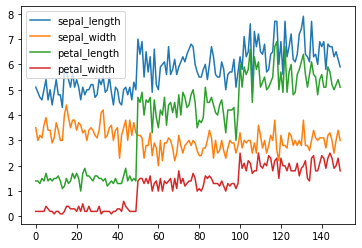

In [ ]:
#In this plot we can see a separation between the classes
iris_df.plot()

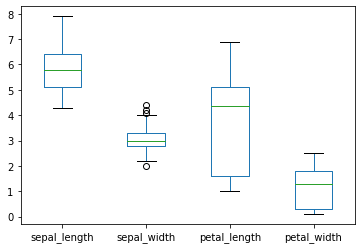

In [ ]:
#Box plot of each column
iris_df.plot(kind='box')

In [ ]:
plt.style.use('ggplot')

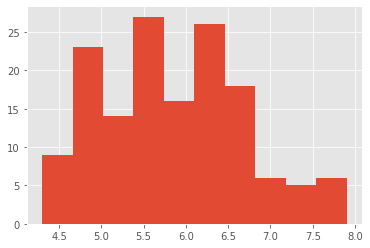

In [ ]:
#Histogram of one column
iris_df['sepal_length'].hist()

In [ ]:
# We separate the predictor variables and the target values 
# The target column 'variety' is aggregated as a new column 'y' with encoded labels

X = pd.DataFrame(iris_df[["sepal_length","sepal_width","petal_length","petal_width"]])
y = list(iris_df["variety"])
le = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1.
y = le.fit_transform(y)
iris_df["y"] = y

In [ ]:
# 'y' corresponds to 0=Setosa, 1=Versicolor,2=Virginica)
iris_df.groupby(['y', 'variety']).count()

,,sepal_length,sepal_width,petal_length,petal_width
y,variety,,,,
0,Setosa,50,50,50,50
1,Versicolor,50,50,50,50
2,Virginica,50,50,50,50


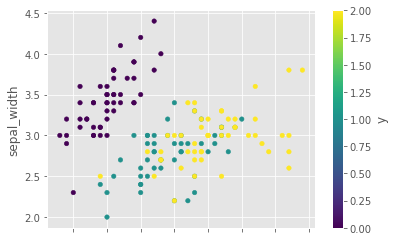

In [ ]:
#Plotting classes by two columns
iris_df.plot.scatter(x="sepal_length", y="sepal_width", c="y", colormap='viridis');

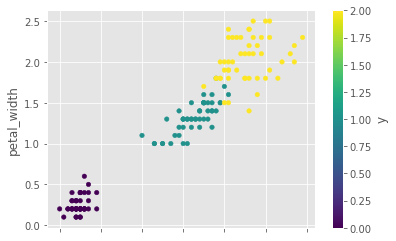

In [ ]:
#Now by the other two columns
iris_df.plot.scatter("petal_length","petal_width", c="y", colormap='viridis');

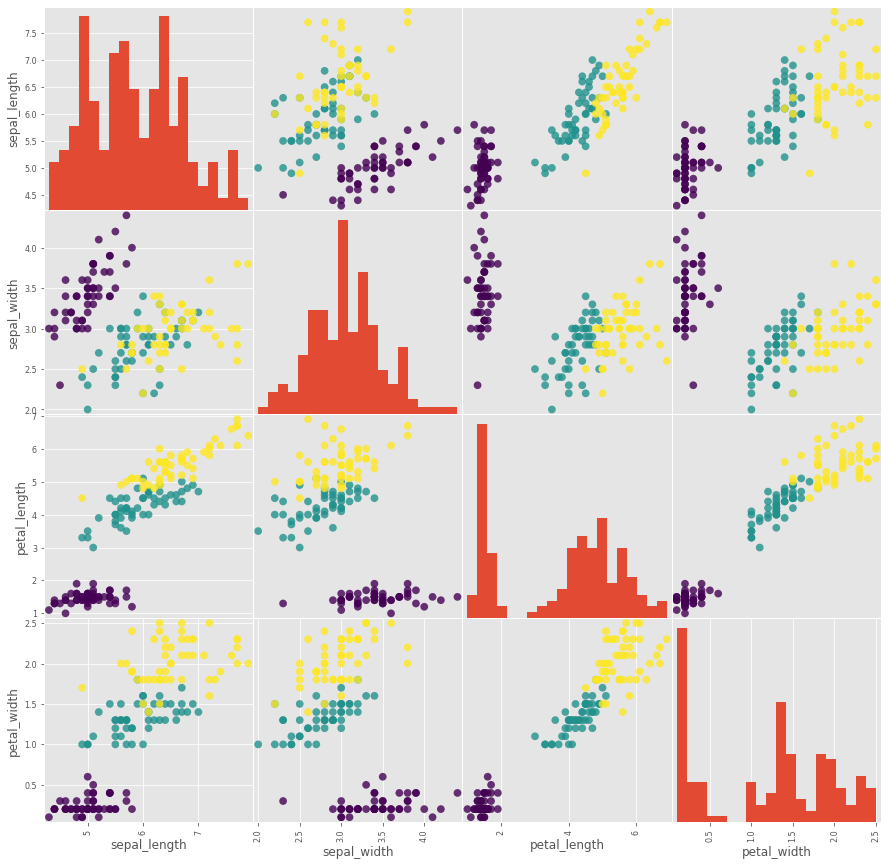

In [ ]:
# Generalizing the previous plots
# Create a scatter matrix from the dataframe, color by class
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8);

## Datos de series de tiempo

In [ ]:
#Para mostrar las capacidades de series de tiempo con pandas, exploraremos un conjunto de tweets de Chile.
tweets = pd.read_csv('https://users.dcc.uchile.cl/~judiaz/DataMining/datasets/tweets.csv')
tweets.shape

(269187, 7)

In [ ]:
tweets.head()

,created_at,idTweet,idUser,latitude,longitude,tweet,texts
0,2016-06-01 00:00:35,737795943467253761,112908419,-33.4466,-70.6512,El nuevo lugar favorito :3 (@ Pazzi Di Pizza) ...,nuevo lugar favorito pazzi pizza _http_
1,2016-06-01 00:01:03,737796064179281920,2427490410,-33.4533,-70.5434,#CONECTOR REPUESTO BNC Y DC https://t.co/jHxH...,conector repuesto bnc _http_ seguridad chile v...
2,2016-06-01 00:01:13,737796104062959617,21530728,-33.5138,-70.6071,"I'm at Pacific Fitness in La Florida, Santiago...",pacific fitness florida santiago chile metropo...
3,2016-06-01 00:02:27,737796415213146112,334990765,-33.1309,-71.5654,"I'm at Santa Isabel in Curauma, Región de Valp...",santa isabel curauma regin valparaso _http_
4,2016-06-01 00:04:14,737796863043248128,84459996,-33.4181,-70.6070,los últimos toques 👌 (at @CostaneraCenter in P...,ltimos toques costaneracenter providencia regi...


Podemos ver que la columna con el nombre "created_at" es la fecha. Con pandas podemos indexar dataframes por fecha y hora y realizar operaciones temporales.

In [ ]:
tweets.index = pd.DatetimeIndex(tweets["created_at"])
tweets.head()

,created_at,idTweet,idUser,latitude,longitude,tweet,texts
created_at,,,,,,,
2016-06-01 00:00:35,2016-06-01 00:00:35,737795943467253761,112908419,-33.4466,-70.6512,El nuevo lugar favorito :3 (@ Pazzi Di Pizza) ...,nuevo lugar favorito pazzi pizza _http_
2016-06-01 00:01:03,2016-06-01 00:01:03,737796064179281920,2427490410,-33.4533,-70.5434,#CONECTOR REPUESTO BNC Y DC https://t.co/jHxH...,conector repuesto bnc _http_ seguridad chile v...
2016-06-01 00:01:13,2016-06-01 00:01:13,737796104062959617,21530728,-33.5138,-70.6071,"I'm at Pacific Fitness in La Florida, Santiago...",pacific fitness florida santiago chile metropo...
2016-06-01 00:02:27,2016-06-01 00:02:27,737796415213146112,334990765,-33.1309,-71.5654,"I'm at Santa Isabel in Curauma, Región de Valp...",santa isabel curauma regin valparaso _http_
2016-06-01 00:04:14,2016-06-01 00:04:14,737796863043248128,84459996,-33.4181,-70.6070,los últimos toques 👌 (at @CostaneraCenter in P...,ltimos toques costaneracenter providencia regi...


Esta función devuelve las `n` palabras más comunes en una lista `L` de textos.

In [ ]:
from collections import Counter

def count_words(L,n):
    words = []
    for text in list(L): 
        for word in str(text).split():
            words.append(word)

    counter_words = Counter(words)
    pairs = counter_words.most_common(n)
    return pairs

count_words(tweets["texts"], 20)

[('_http_', 249261),
 ('regin', 31690),
 ('chile', 29330),
 ('santiago', 28622),
 ('metropolitana', 21638),
 ('san', 11674),
 ('fuego', 8024),
 ('hoy', 7903),
 ('avenida', 5880),
 ('valparaso', 5766),
 ('accidente', 5701),
 ('vehicular', 5693),
 ('parque', 5581),
 ('condes', 5410),
 ('temuco', 5365),
 ('providencia', 5164),
 ('jaja', 5163),
 ('talca', 4962),
 ('via', 4893),
 ('mar', 4873)]

Analicemos las palabras más comunes los fines de semana (sábado y domingo) y las palabras más comunes los días de semana (lunes, martes, miércoles, jueves, viernes)

In [ ]:
n=50

#Most frequent n words on weekends (Saturday and Sunday)
df_week_end = tweets[tweets.index.dayofweek >= 5] 
words_wend = count_words(df_week_end["texts"], n)
words_wend = set([p[0] for p in words_wend]) #Inline for loop
#words_wend

In [ ]:
#Most frequent words on weekdays (Monday to Friday)
df_week_day = tweets[tweets.index.dayofweek < 5] 
words_wday = count_words(df_week_day["texts"], n)
words_wday = set([p[0] for p in words_wday])
#words_wday

In [ ]:
#Most frequent words on weekends that are unfrequent on weekdays
print(list(words_wend.difference(words_wday)))

['estadio', 'amor', 'noche', 'amigos', 'domingo', 'cerro', 'club', 'playa', 'familia', 'condominio']


In [ ]:
#Most frequent words on weekdays that are unfrequent on weekends
print(list(words_wday.difference(words_wend) ))

['basura', 'edificio', 'universidad', 'sur', 'gran', 'maip', 'metro', 'buen', 'semana', 'llamado']


Vamos a ver por hora del día

In [ ]:
df_morning = tweets[(tweets.index.hour < 14) & (tweets.index.hour >= 6)] 
words_morning = count_words(df_morning["texts"], n)
words_morning = set([p[0] for p in words_morning])
#words_morning

In [ ]:
df_afternoon = tweets[(tweets.index.hour >= 14) & (tweets.index.hour < 22)] 
words_afternoon = count_words(df_afternoon["texts"], n)
words_afternoon = set([p[0] for p in words_afternoon])
#words_afternoon

In [ ]:
df_night = tweets[(tweets.index.hour < 6 )| (tweets.index.hour >= 22)] 
words_night = count_words(df_night["texts"], n)
words_night = set([p[0] for p in words_night])
#words_night

In [ ]:
#Morning
print(list(words_morning.difference(words_night).difference(words_afternoon)))

['aeropuerto', 'buenos', 'viernes', 'das', 'metro', 'puente', 'recoleta', 'buen', 'pedro', 'llamado', 'internacional']


In [ ]:
#Afternoon
print(list(words_afternoon.difference(words_morning).difference(words_night)))

['almuerzo', 'personas', 'puerto', 'cerro', 'playa']


In [ ]:
#Night
print(list(words_night.difference(words_afternoon).difference(words_morning)))

['amor', 'noche', 'siempre', 'amigos', 'uoa', 'gran', 'familia', 'condominio']


# Clasificación usando Python

## Ejemplo: Iris Dataset

Vamos a ocupar el dataset **iris** disponible en sklearn, que como hemos visto contiene 150 **instancias** (filas) de 3 **clases** diferentes de flores. El método **load_iris** permite cargar el dataset.

In [ ]:
#Para cargar las bibliotecas, haz click en el siguiente bloque de código, y ejecútalo presionando `Shift+Enter`:
from sklearn.datasets import load_iris

print("Si se muestra esto es porque ya está instalado!")

Si se muestra esto es porque ya está instalado!


In [ ]:
iris = load_iris()

X = iris.data      ## datos, caracteristicas o features de cada flor. 
y = iris.target    ## clase para cada instancia anterior.

print("X:\n", X[:10])   # muestra las primeras 10 filas que corresponden a las caracteristicas de 10 flores. 
print("y:\n", y[:10])   # muestra las primeras 10 clases para cada una de las instancias de X

X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y:
 [0 0 0 0 0 0 0 0 0 0]


Podemos saber los nombres de los *features* (columnas) usando el campo **feature_names**:

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Para saber cuáles son las clases:

In [ ]:
print(iris.target)  # mostramos todas las clases de X 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**0 Corresponde a setosa; 
1 Corresponde a versicolor;
2 Corresponde a virginica**


Podemos verificar esto haciendo.

In [ ]:
print(iris.target_names)   

['setosa' 'versicolor' 'virginica']


In [ ]:
type(iris.data)

numpy.ndarray

En resumen, lo que tenemos es la descripción de una flor (medidas) en una fila, acompañada con la clase. Por ejemplo, para la segunda fila, tenemos:

**4.9,  3. ,  1.4,  0.2**  y la clase asociada es **0 (setosa)**

In [ ]:
print(iris.data[1], iris.target[1])

[4.9 3.  1.4 0.2] 0


Podemos obtener una descripción más completa usando:

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Lo que haremos a continuación será entrenar un clasificador y predecir con nuevos datos. 


## Nuestro primer clasificador

Entrenaremos nuestro primer clasificador con *Iris dataset*. 
Para esto, usaremos un árbol de decisión.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)   ## Entrenar usando X (features), y (clase)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Con el método **fit** entrenamos el clasificador con los datos de <b>X</b> y la clase asociada a cada uno, **y**. Para ver qué tan bien fue el entrenamiento, podemos evaluar el clasificador ejecutándolo sobre instancias y verificando que la clase sea la correcta. 

Ya hemos entrenado nuestro clasificador empleando **fit**. Luego para predecir, usamos **predict**.

In [ ]:
y_pred = clf.predict(X)   ## predecir 'y' usando la matriz 'X'

Por ejemplo, si ejecutáramos ```clf.predict([[5.1, 3.5, 1.4, 0.2]])```, le estamos pasando al clasificador un dato con valores **[5.1, 3.5, 1.4, 0.2]**. Al ejecutar **predict**, éste nos retornará un arreglo con el valor <b>0</b>, indicando que esos datos fueron clasificados como la clase **0 (setosa)**.

En **scikit-learn** existe el método **accuracy_score** que computa el Accuracy de la clasificación:

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


Como se puede apreciar, tuvimos un accuracy del 100% con el clasificador (1.0). Sin embargo, **hicimos algo incorrecto**: evaluamos el clasificador con los mismos datos con los cuales lo entrenamos! 

Al hacer esto, lo que terminamos haciendo fue *aprender de los datos de entrada* y evaluamos (o testeamos) usando los mismos datos. Esto también se denomina **overfitting**. 

También podríamos ver otras métricas como precision, recall y f-score. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Desde luego, la clasificación es 'perfecta'. Para tener un resultado más realista de la clasificación vamos a dividir el dataset en dos: **training set** y **test set**.

El **training_set** nos permite aprender de ejemplos y ajustar el clasificador de acuerdo a éstos. 
El **test_set** nos permitirá comprender qué tan bien **generalizamos** con nuevos datos. 

 En **scikit-learn** existe un método llamado **train_test_split**, que nos permite hacer esta separación de manera aleatoria y estratificada (es decir, manteniendo la proporción de clases entre las instancias de cada set):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=37, stratify=y)

El método retorna cuatro listas, los correspondientes a train y a test. Es decir, para el entrenamiento se usará **X_train** que tiene los features de entrenamiento e **y_train** que son sus respectivas clases. Así mismo, para probar con nuevos datos (testing), usaremos **X_test** como los features de entrada e **y_test** como las clases respectivas. 

* El parámetro **test_size** nos permite regular la fracción de los datos que irán a test; en este caso 33% del dataset completo. 

* El parámetro **random_state** nos permite fijar la semilla para tener resultados consistentes (genera la misma partición de datos). Si ejecutamos el método varias veces con la misma semilla, nos mostrará los mismos resultados siempre. 

* El parámetro **stratify** recibe un arreglo con la distribución de clases, y el método intenta mantener esa misma distribución en las listas resultantes. Si no hicieramos esto, podríamos, por ejemplo, tener muchos datos de una clase en el set de entrenamiento. 

Ahora, al fin, podemos probar nuestro clasificador:

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)
print("Accuracy en test set:", accuracy_score(y_test, y_pred))   ## Evaluamos la predicción comparando y_test con y_pred

Accuracy en test set: 0.98
